# Simulación del pendulo simple con torch

In [1]:
import torch
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

%matplotlib inline

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
# Definir los parámetros del péndulo
L = 1 # Longitud de la cuerda (m)
m = 1 # Masa del péndulo (kg)
g = 9.8 # Aceleración de la gravedad (m/s^2)
theta0 = 0.5 # Ángulo inicial (rad)
omega0 = 0 # Velocidad angular inicial (rad/s)

In [4]:
# Definir las ecuaciones del movimiento
def f(theta, omega):
    return omega, -g/L * torch.sin(theta)

In [5]:
# Definir el método numérico (Euler)
def euler(f, theta0, omega0, dt):
    theta1 = theta0 + dt * f(theta0, omega0)[0]
    omega1 = omega0 + dt * f(theta0, omega0)[1]
    return theta1, omega1

In [6]:
# Definir el intervalo de tiempo y el paso
tmin = 0 # Tiempo inicial (s)
tmax = 10 # Tiempo final (s)
dt = 0.01 # Paso de tiempo (s)

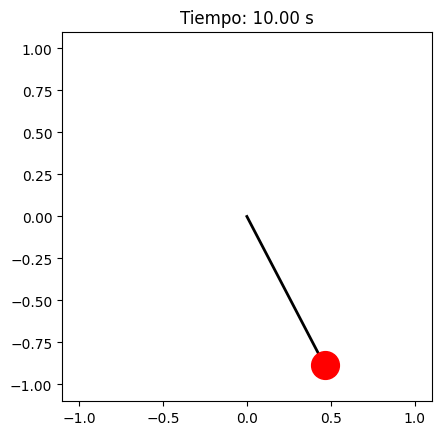

In [7]:
# Crear los tensores para almacenar los resultados
t = torch.arange(tmin, tmax+dt, dt) # Tensor de tiempo
theta = torch.zeros_like(t) # Tensor de ángulo
omega = torch.zeros_like(t) # Tensor de velocidad angular

# Asignar las condiciones iniciales
theta[0] = theta0
omega[0] = omega0

# Resolver las ecuaciones usando el método numérico
for i in range(1,len(t)):
    theta[i], omega[i] = euler(f, theta[i-1], omega[i-1], dt)

# Crear la figura y los ejes
fig, ax = plt.subplots()
ax.set_xlim(-L-0.1, L+0.1)
ax.set_ylim(-L-0.1, L+0.1)
ax.set_aspect('equal')

# Crear la línea que representa la cuerda
line, = ax.plot([], [], 'k-', lw=2)

# Crear el punto que representa el péndulo
point, = ax.plot([], [], 'ro', ms=20)

# Función de animación
def animate(i):
    x = L * torch.sin(theta[:i+1]) # Coordenada x del péndulo
    y = -L * torch.cos(theta[:i+1]) # Coordenada y del péndulo
    
    # Actualizar la posición de la cuerda y el punto
    line.set_data([0, x[-1]], [0, y[-1]])
    # point.set_data(x[-1], y[-1])
    point.set_data([x[-1]], [y[-1]])

    
    # Mostrar el tiempo actual
    ax.set_title(f'Tiempo: {t[i]:.2f} s')
    
    return line, point

# Crear la animación
anim = FuncAnimation(fig, animate, frames=len(t), interval=10, blit=True)

# Mostrar la animación
# plt.show()
anim.save('pendulo.mp4')


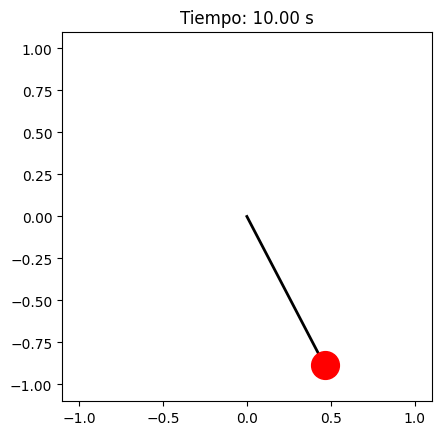

In [8]:
# Crear los tensores para almacenar los resultados
t = torch.arange(tmin, tmax+dt, dt, device=device) # Tensor de tiempo
theta = torch.zeros_like(t, device=device) # Tensor de ángulo
omega = torch.zeros_like(t, device=device) # Tensor de velocidad angular

# Asignar las condiciones iniciales
theta[0] = theta0
omega[0] = omega0

# Resolver las ecuaciones usando el método numérico
for i in range(1,len(t)):
    theta[i], omega[i] = euler(f, theta[i-1], omega[i-1], dt)

# Crear la figura y los ejes
fig, ax = plt.subplots()
ax.set_xlim(-L-0.1, L+0.1)
ax.set_ylim(-L-0.1, L+0.1)
ax.set_aspect('equal')

# Crear la línea que representa la cuerda
line, = ax.plot([], [], 'k-', lw=2)

# Crear el punto que representa el péndulo
point, = ax.plot([], [], 'ro', ms=20)

# Función de animación
def animate(i):
    x = L * torch.sin(theta[:i+1]).cpu() # Coordenada x del péndulo
    y = -L * torch.cos(theta[:i+1]).cpu() # Coordenada y del péndulo
    
    # Actualizar la posición de la cuerda y el punto
    line.set_data([0, x[-1]], [0, y[-1]])
    # point.set_data(x[-1], y[-1])
    point.set_data([x[-1]], [y[-1]])

    
    # Mostrar el tiempo actual
    ax.set_title(f'Tiempo: {t[i]:.2f} s')
    
    return line, point

# Crear la animación
anim = FuncAnimation(fig, animate, frames=len(t), interval=10, blit=True)

# Mostrar la animación
# plt.show()
anim.save('pendulo.mp4')